# **Multivariate Linear Regression**


*   Selected Dataset: [Parkinson's Telemonitoring Data Set](https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring)
*   Objective: Predict the total UPDRS value of people with early-stage Parkinson's disease



In [ ]:
#import NumPy, Pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load the dataset
data = pd.read_csv('parkinsons_updrs.csv')
data.head(5)

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [ ]:
#take the min and max of each column
mi=data.min()
ma=data.max()

#take the min and max of output column to unnormalize the prediction data(at the end)
min_y = data.iloc[:,18:19].values.min()
max_y = data.iloc[:,18:19].values.max()

#normalize data
data = (data - mi)/(ma - mi)

In [ ]:
#set the matrices 

#column 0 to 17 are taken as independent variables
X = data.iloc[:,0:18] 

# 1 embedded to front and X converted from pandas.core.frame.DataFrame to numpy.ndarray
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

#column 18 is taken as the dependent variable and converted from pandas.core.frame.DataFrame to numpy.ndarray
y = data.iloc[:,18:19].values

theta = np.zeros([1,19]) #an array of 0s is taken as initial theta

#set hyper parameters
alpha = 0.09 # Learning rate
iters = 1000  # Number of iterations for the gradient descent algorithm

#taking the length of y
size_of_y = len(y)

# Hypothesis Function: g(x)

In [ ]:
#hypothesis function
def hypothesis(theta, X):
    return theta*X

# Cost Function: J(𝜃)

In [ ]:
#cost function
def calculateCost(X,y,theta):
    temp = np.power(((X @ theta.T)-y),2) #take the squared error 
    return np.sum(temp)/(2 * len(X)) #sum of all squared errors, divided by 2N

# Gradient Descent Algorithm

In [ ]:
#Gradient Descent Algorithm
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = calculateCost(X, y, theta)
    
    return theta,cost

# Training the Model

In [ ]:
#calculating cost before applying Gradient Descent Algorithm
costBeforeGradientDescent = calculateCost(X,y,theta)

#running the Gradient Descent Algorithm and cost function
optimizedTheta,cost = gradientDescent(X,y,theta,iters,alpha)

#calculating cost after applying Gradient Descent Algorithm
finalCost = calculateCost(X,y,optimizedTheta)

print('Initial Cost = ', costBeforeGradientDescent)
print('Final Cost = ', finalCost)
print('\nOptimized theta values:', optimizedTheta)

Initial Cost =  0.13010204258677666
Final Cost =  0.02126327278006169

Optimized theta values: [[ 0.1806859   0.33441118  0.07133561  0.00461211 -0.01000504  0.00274421
  -0.00388552  0.00276686 -0.00259243  0.00273039 -0.01441205 -0.01138688
   0.03468153 -0.01441461 -0.03054355 -0.0282465   0.1732504  -0.1511082
   0.16125232]]


So, this after the gradient descent algorithm, the sum of squared error has been reduced to **0.021**. 

𝜃 values in the final hypothesis: 

>𝜃0: 0.1806859, 𝜃1: 0.33441118, 𝜃2: 0.07133561, 𝜃3: 0.00461211, 𝜃4: -0.01000504, 𝜃5: 0.00274421, 𝜃6: -0.00388552, 𝜃7: 0.00276686, 𝜃8: -0.00259243, 𝜃9: 0.00273039, 𝜃10: -0.01441205, 𝜃11: -0.01138688, 𝜃12: 0.03468153, 𝜃13: -0.01441461, 𝜃14: -0.03054355, 𝜃15: -0.0282465, 𝜃16:  0.1732504, 𝜃17: -0.1511082, 𝜃18:  0.16125232



# Convergence

Text(0.5, 1.0, 'Convergence')

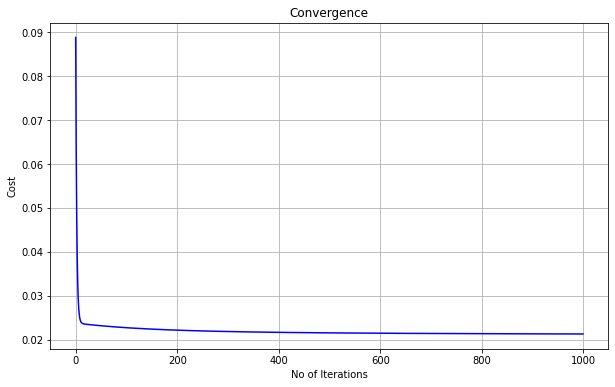

In [ ]:
#plotting the convergence graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot(np.arange(iters), cost, 'r', color="blue")
ax.grid()  
ax.set_xlabel('No of Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Convergence') 

# Testing the Model

In [ ]:
#predict the output using the model
y_pred = hypothesis(optimizedTheta,X)
y_pred = np.sum(y_pred, axis=1)

y_matrix = np.ravel(y)

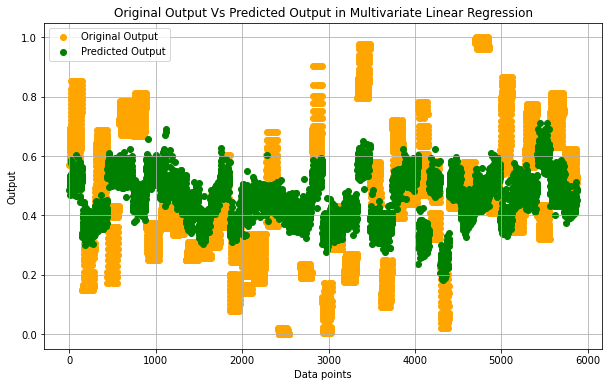

In [ ]:
#plotting original y and predicted y
plt.figure(figsize=(10, 6))
plt.scatter(x=np.arange(size_of_y),y=y_matrix, color='orange')  #original output
plt.scatter(x=np.arange(size_of_y),y=y_pred, color='green') #predicted output

plt.xlabel('Data points')  
plt.ylabel('Output')  
plt.title('Original Output Vs Predicted Output in Multivariate Linear Regression') 

labels=['Original Output','Predicted Output']
plt.legend(labels)

plt.grid()
plt.show()

# Variation of Convergence for Changing Values of Learning Rate

Here the learning rate values are changed to visualize which rate gives the best convergnce

Text(0.5, 1.0, 'Convergence')

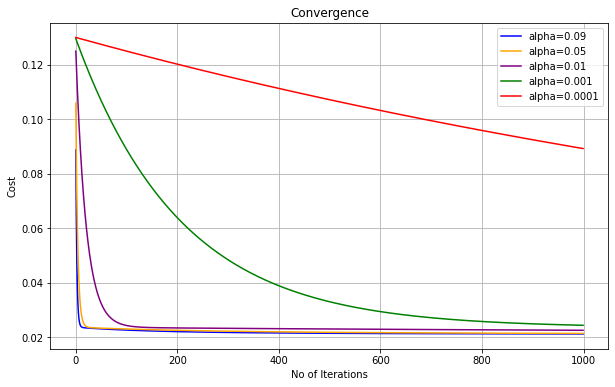

In [ ]:
optimizedTheta,cost1 = gradientDescent(X,y,theta,iters,0.09)
optimizedTheta,cost2 = gradientDescent(X,y,theta,iters,0.05)
optimizedTheta,cost3 = gradientDescent(X,y,theta,iters,0.01)
optimizedTheta,cost4 = gradientDescent(X,y,theta,iters,0.001)
optimizedTheta,cost5 = gradientDescent(X,y,theta,iters,0.0001)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot(np.arange(iters), cost1, 'r', color="blue", label="alpha=0.09")
ax.plot(np.arange(iters), cost2, 'r', color="orange", label="alpha=0.05")
ax.plot(np.arange(iters), cost3, 'r', color="purple", label="alpha=0.01")
ax.plot(np.arange(iters), cost4, 'r', color="green", label="alpha=0.001")
ax.plot(np.arange(iters), cost5, 'r', color="red", label="alpha=0.0001")
ax.legend()
ax.grid()  
ax.set_xlabel('No of Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Convergence') 


# Prediction
Predicting the output (total UPDRS) for test data using the trained model. 

In [ ]:
#load the test dataset
test_data = pd.read_csv('test_data.csv')
test_data = test_data.loc[1:]
test_data

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
1,72,103.64,0.0053,0.000032,0.00241,0.00231,0.00724,0.02791,0.291,0.0131,0.0126,0.02069,0.0393,0.018093,23.533,0.51577,0.5679,0.21461,0


In [ ]:
#normalize the data
test_data = (test_data - mi)/(ma - mi)

In [ ]:
test_data = test_data.iloc[:,0:18] 

# 1 embedded to front and test_data converted from pandas.core.frame.DataFrame to numpy.ndarray
ones = np.ones([test_data.shape[0],1])
test_data = np.concatenate((ones,test_data),axis=1)

#reshaping the test data matrix 
test_data = test_data.reshape(19, 1)

In [ ]:
#matrix multiplication with the optimized theta
res = np.sum(test_data @ optimizedTheta)

res = (res*(max_y - min_y)) + min_y

print("Predicted total UPDRS:", res)


Predicted total UPDRS: 48.43973985314469


This test data is the 15th datapoint of the dataset. 

> Here, the original output value is: **41.657**




> Predicted value is: **48.44**

